# Homework 2 (Dev Mody)
## Exercise 4: Linear regression with optimization

Lets now try to do linear regression on a data set but this time using gradient descent to find the optimal solution. As in the previous exercise we could have found the minimum exactly but it’s a nice exercise to use gradient descent. The data set we will be working with is `kleibers_law_data.csv`. After collecting and plotting a considerable amount of data comparing the body mass versus metabolic rate (a measure of at rest energy expenditure) of a variety of animals, early twentieth-century biologist Max Kleiber noted an interesting relationship between the two values. Denoting by $x_p$ and $y_p$ the body mass (in kg) and the metabolic rate (in KJ/day) of a given animal respectively, treating the body mass as the input
feature Kleiber noted (by visual inspection) that the natural log of these two values were linearly related. That is:
$$w_0 + \log (x_p)w_1 \backsimeq \log (y_p)$$

### Exercise 4.1: Define a Model
First take the log of $x$ and $y$. Then define a python function `model` according to the above description. Then define a second python function `least_squares` corresponding to the least squares sum

ANSWER: The following code is shown below:

In [3]:
from autograd import value_and_grad, grad
import autograd.numpy as np

def model (w):
    return w[0]+(x*w[1])

def least_squares (w):
    return (1/(len(y)))*np.sum((model(w)-y)**2)

csvname = '/Users/devmody/Documents/Courses/3ml3/homeworks/homework2/kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
X = data[:-1,:]
Y = data[-1:,:] 
X = np.log(X)
Y = np.log(Y)
X = X.reshape(X.shape[1],1)
Y = Y.reshape(Y.shape[1],1)

### Exercise 4.2: Using Gradient Descent

Use gradient descent to find the minimum of the cost function. Perform 1000 iterations with $\alpha = 0.01$, starting from a random point in the two dimensional plane, not too far from the origin.

ANSWER: The code of Standard Gradient Descent + the Experiment is implemented below:

In [5]:
def standard_gradient_descent (g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range(max_its):
        eval_grad = gradient(w)
        w = w - alpha*eval_grad
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

w = np.random.randn(2)
alpha = 0.01
max_its = 1000
weight_history, cost_history = standard_gradient_descent(least_squares, alpha, max_its, w)

### Exercise 4.3: Plotting the Fitted Model + Data + Cost History

Make a plot of the data along with the fitted linear model. Make another plot of cost history versus iterations.

ANSWER: The plotting of the above information is implemented below

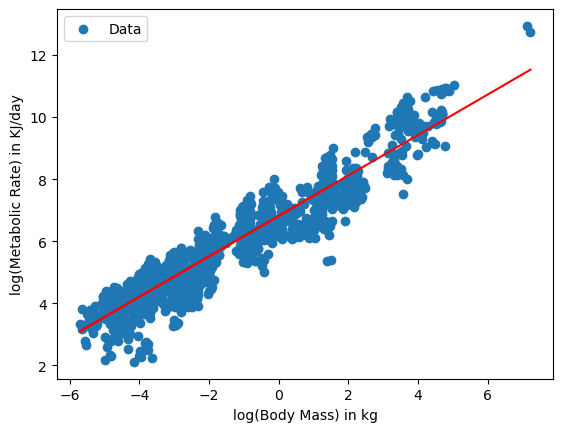

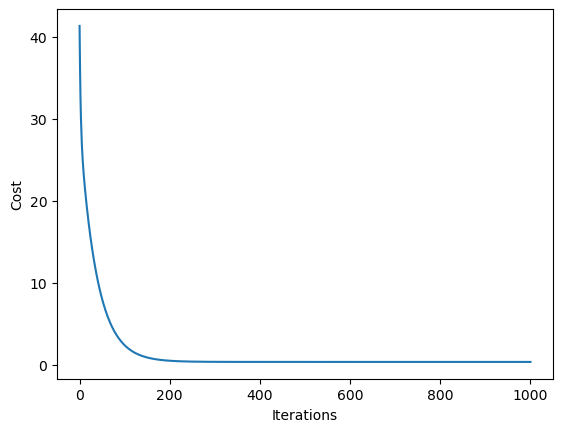

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, label="Data")
plt.plot(X, model(weight_history[-1]), color='r')
plt.xlabel("log(Body Mass) in kg")
plt.ylabel("log(Metabolic Rate) in KJ/day")
plt.legend()
plt.show()

plt.plot(range(max_its + 1), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()



### Exercise 4.4: Animal Calories Prediction

Use the fitted line to determine how many calories an animal weighing 10kg requires (note
each calorie is equivalent to 4.18J)

ANSWER: The prediction is implemented below

In [9]:
animal_weight = np.log(10)
prediction = weight_history[-1][0]+(animal_weight*weight_history[-1][1])
energy_in_kj = kj = np.exp(prediction)
j = kj * 1000
calories = (j / 4.18) / 1000
print(f"Estimated Total energy in calories: {calories:.2f}")

Estimated Total energy in calories: 980.01
